In [1]:
import sympy
import sympy.physics.mechanics as mech
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate


%matplotlib inline

sympy.init_printing()

In [2]:
from pymola.parser import parse
from  pymola.backends.sympy.generator import generate

In [3]:
tree = parse('''
model BouncingBall "the bouncing ball model"
    parameter Real g=9.81; //gravitational acc.
    parameter Real c=0.90; //elasticity constant.
    Real height(start=10), velocity(start=0);
    output Real h;
equation
    der(height) = velocity;
    der(velocity) = -g;
    when height<0 then
        reinit(velocity, -c*velocity);
    end when;
algorithm
    h := height;
end BouncingBall;
''')

In [4]:
dae = generate(tree, 'BouncingBall')
dae.x0 = np.array([10, 0])
dae.u0 = np.array([])
dae.p0 = np.array([9.81, 0.9])

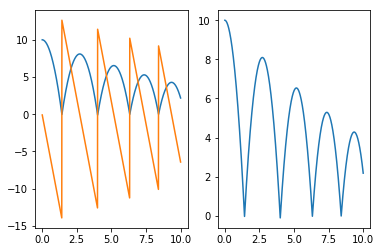

In [5]:
data = dae.simulate(0.01)

plt.figure()
plt.subplot(121)
plt.plot(data['t'], data['x'])

plt.subplot(122)
plt.plot(data['t'], data['y'])